### <font color="red">The Project Notebook can also be accessed at my Github account through the below URL</font>

https://github.com/kurdi1mans/Finding-Donors-for-CharityML

## Supervised Learning
## Project: Finding Donors for *CharityML*

In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
import platform
print("This code has been developed on Jupyter Notebook (5.7.0) running Python 3.6.3.")
print("If your version of Python is different, you might run into issues.")
print("Your Python version is ",platform.python_version())

This code has been developed on Jupyter Notebook (5.7.0) running Python 3.6.3.
If your version of Python is different, you might run into issues.
Your Python version is  3.7.3


## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [3]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data.income[data.income == '>50K'].count()

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data.income[data.income == '<=50K'].count()

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k/data.income.count()*100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

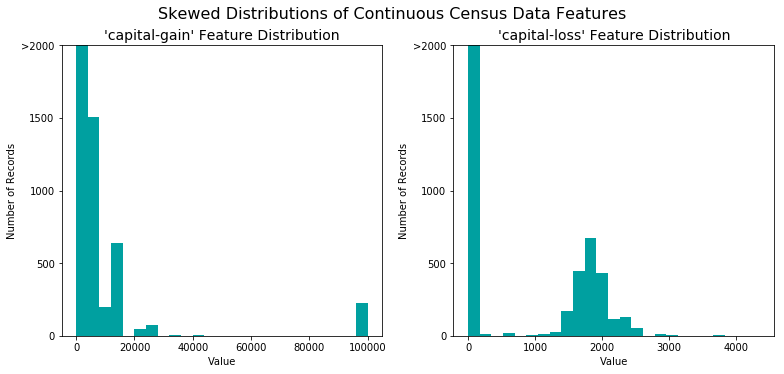

In [4]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)


For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

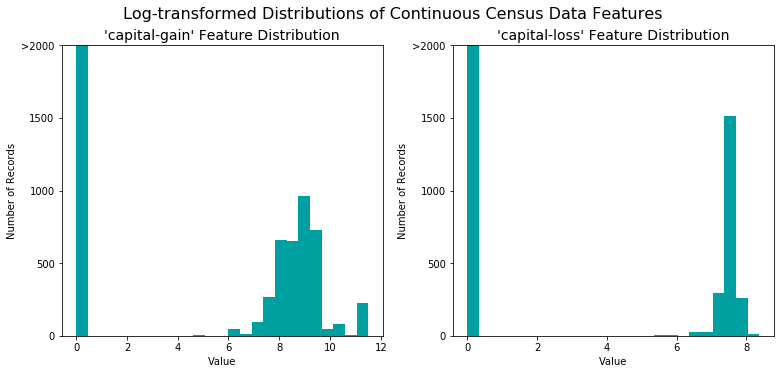

In [5]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [6]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

/usr/local/anaconda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [7]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.map({'<=50K':0,'>50K':1})

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
# print encoded


103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [8]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [9]:

TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

#print("TP = ",TP)
#print("FP = ",FP)
#print("TN = ",TN)
#print("FN = ",FN)

# TODO: Calculate accuracy, precision and recall
accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1+beta**2)*((precision*recall)/(((beta**2)*precision)+(recall)))

#print("accuracy = ",accuracy)
#print("recall = ",recall)
#print("precision = ",precision)
#print("fscore = ",fscore)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**HINT:**

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer:**
- <font size="4" color="Green"><b>Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)</b></font>
    - <font color = "blue">Describe one real-world application in industry where the model can be applied.</font> 
        - One of the major applications of Ensemble Methods is in the field Land Cover Mapping<sup>[1]</sup> which involves Remote Sensing<sup>[1][2]</sup> and Geo-spatial Data processing<sup>[1]</sup>. Ensemble methods (such as Bagging, Boosting, and Random Forests) are used in combination with other algorithms such as Artificial Neural Networks, Kernel Principal Component Analysis, and Decision Trees to process remotely sensed data (such as satellite images) in order to identify land cover objects such as vegetation, water surfaces, roads, buildings, and many others.<sup>[1]</sup>
        - Sources:
            - [1] https://en.wikipedia.org/wiki/Ensemble_learning#Ensemble_learning_applications
            - [2] Oza, Nikunj C., and Kagan Tumer. "Classifier ensembles: Select real-world applications." Information Fusion 9.1 (2008): 4-20.
    
    - <font color="blue">What are the strengths of the model; when does it perform well?</font>
        - The main strength of Ensemble methods is their ability to combine multiple varaiants of a model in a single model.<sup>[1]</sup> This approach permits training each variant of the model with a different subset of the features (e.g. Random Forests); hence, reducing model bias.<sup>[1]</sup>
        - Moreover, Ensemble methods also allow for subsequent variants of the model (e.g. in Boosting) to focus on data points that were not fitted properly in the previous fitting step of the model. This technique also helps reducing model bias.
        - Furthermore, some Ensemble methods allow for parallelization of processing (e.g. in Bagging) which reduces the learning duration (although it might increase the overall consumption of computational resource).<sup>[citation needed]</sup>
        - Despite the fact that Ensemble methods are "in general" not likely to overfit.<sup>[2]</sup> In some specific cases (e.g. in Boosting) overfitting might still be an issue to tackle.<sup>[3]</sup> However, in general, overfitting is not likely to happen with Ensemble methods.<sup>[2]</sup>
        - To sum up, Ensemble methods give us an excellent toolset to reduce bias and overfitting while keeping the model training duration, potentailly, short.
        - Sources:
            - [1] Bühlmann, Peter. "Bagging, boosting and ensemble methods." Handbook of Computational Statistics. Springer, Berlin, Heidelberg, 2012. 985-1022.
            - [2] https://medium.com/@aravanshad/ensemble-methods-95533944783f
            - [3] https://www.coursera.org/lecture/ml-classification/overfitting-in-boosting-8SGv8
    - <font color="blue">What are the weaknesses of the model; when does it perform poorly?</font>
        - The interpretability of Ensemble methods is very poor.<sup>[1]</sup> Interpretability is important to attain business buy-in especially during the rollout of a solution that uses a new predictive model.
        - One of the drawbacks of Ensemble methods is the fact they consume lots of computational resources <sup>[2]</sup> both in terms of memory and processing power. This is, however, should not be confused with the potential reduction of training time facilitated by paralellization of processing.
        - Ensemble methods will very likely result into a sub-optimal approximations of the optimal solution. Spending more time on optimizing the base model without the use of Ensemble methods might result into a more idea fit on the data.<sup>[2]</sup>
        - It's also noted by some sources that Boosting techniques might work very well with probabilistic models.<sup>[3]</sup>
        - Sources:
            - [1] Bühlmann, Peter. "Bagging, boosting and ensemble methods." Handbook of Computational Statistics. Springer, Berlin, Heidelberg, 2012. 985-1022.
            - [2] https://medium.com/@aravanshad/ensemble-methods-95533944783f
            - [3] https://stats.stackexchange.com/questions/109831/why-not-always-use-ensemble-learning
            
    - <font color="blue">What makes this model a good candidate for the problem, given what you know about the data?</font>
        - Due to the fact that we have 103 features in our dataset (most of which are binary values), the target model is expected to have enough flexibility with this sizable number of features. Ensemble methods are known to provide such a flexibity where subsets of the features can be used to build seperate models that can be merged together (e.g. Random Forests and Bagging techniques).
        


- <font size="4" color="Green"><b>Support Vector Machines (SVM)</b></font>
    - <font color = "blue">Describe one real-world application in industry where the model can be applied.</font> 
        - One of read-world applications of Support Vector Machines is in text and hypertext categorizations.<sup>[1]</sup>. Their main advantage here is the fact that they can be trained with a relatively smaller labeled training set which is more practical for training.<sup>[1]</sup>
        - Sources:
            - [1] https://en.wikipedia.org/wiki/Support-vector_machine#Applications
    - <font color="blue">What are the strengths of the model; when does it perform well?</font>
        - one major advantage of SVMs is the fact that they remain effective even if the number of features in the dataset is higher that the size of the training instances.<sup>[1]</sup>
        - Normally, Support Vector Machines are relatively more effecient compared to other algorithms when the training belongs to a high dimensional space.<sup>[1]</sup>
        - SVMs are one of the best go-to options when the classification problem involves classes that are cleanly seperable.<sup>[2]</sup>
        - An advantage to SVMs is that they are less sensitive to outliers when compared to other similar algorithms.<sup>[2]</sup>
        - 
        - Sources:
            - [1] https://medium.com/coinmonks/support-vector-machines-svm-b2b433419d73
            - [2] https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589
    - <font color="blue">What are the weaknesses of the model; when does it perform poorly?</font>
        - When building probabilistic models, SVMs are much less effiective when compared to other algorithms such as Logistic Regression or Bayesian Classifiers<sup>[1]</sup>
        - In the case of a large training data set, SVMs require a lot of training time to fit the data.<sup>[2]</sup>
        - SVMs are predictive perforamnce degrades when the classification problem at hand involves overlapping classes.<sup>[1]</sup>
        - The tuning of the parameters of an SVM classifier (includes regularization, learning rate, and kernel) is a tricky and vital step to the success of the classifier.<sup>[1]</sup>
        - Sources:
            - [1] https://towardsdatascience.com/support-vector-machine-vs-logistic-regression-94cc2975433f
            - [2] https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589
    - <font color="blue">What makes this model a good candidate for the problem, given what you know about the data?</font>
        - Due to the fact that we have a relatively large feature set (namely, 103 features), SVMs might be the go-to option since they generally perform well with large feature sets.
        - We cannot tell by now if the classes we are dealing with are overlapping or non-overlapping. However, upon trying the SVMs with our proplem, they might prove themselves capable of seperateling the classes at hand.
        
- <font size="4" color="Green"><b>Decision Trees</b></font>
    - <font color = "blue">Describe one real-world application in industry where the model can be applied.</font> 
        - Financial Fraud Detection is one important real-world application of Decision Trees where all the features of financial transactions or statements can be analyzed by the tree to attain a highly accurate detection rate.<sup>[1]</sup>
        - Sources:
            - [1] http://what-when-how.com/artificial-intelligence/decision-tree-applications-for-data-modelling-artificial-intelligence/
    - <font color="blue">What are the strengths of the model; when does it perform well?</font>
        - Decision Trees are way more interpretable when compared to other algorithms. The heirarchical classifiers of Decision Trees resemble simple if else conditions that humans can easily understand.<sup>[1][2][3]</sup>
        - Even if you decided to use an algorithm other than Decision Trees, The high interpretability of Decision Trees can still be used to analyze and explore the dataset at hand for more insight on the most important features that need to be considered in the classification problem.<sup>[1]</sup>
        - Decision Trees are resiliant to messy data. It handle missing features<sup>[1][2]</sup>, outliers<sup>[1][2][3]</sup>, and heavily skewed data.<sup>[2]</sup>
        - Decision Trees can handle both numerical (i.e. continuous and real-values) and categorical (discrete) features.<sup>[1][3]</sup>
        - Decision Trees are also non-prarameteric in nature which requires no assumptions to be made about the distribution of the feature space.<sup>[1][2]</sup>
        - Decision Trees are also not sensitive to complex relationships between the different features which simplifies the construction of a classifiers on top of a highly complex feature space.<sup>[1][2]</sup> 
        - Sources:
            - [1] https://medium.com/greyatom/decision-trees-a-simple-way-to-visualize-a-decision-dc506a403aeb
            - [2] Song, Yan-Yan, and L. U. Ying. "Decision tree methods: applications for classification and prediction." Shanghai archives of psychiatry 27.2 (2015): 130.
            - [3] https://towardsdatascience.com/decision-tree-in-machine-learning-e380942a4c96
    - <font color="blue">What are the weaknesses of the model; when does it perform poorly?</font>
        - Decision Trees suffer from a tendency to overfit the training data.<sup>[1]</sup>
        - Despite the fact that Decision Tree can handle continuous variable, they actually lose information by chunking the values into ranges, leading to sub-optimal performances.<sup>1</sup>
        - Decision Trees also suffer from bias problems when the training set has dominant classes.<sup>[1][2]</sup>
        - Sources:
            - [1] https://medium.com/greyatom/decision-trees-a-simple-way-to-visualize-a-decision-dc506a403aeb
            - [2] https://towardsdatascience.com/decision-tree-in-machine-learning-e380942a4c96
    - <font color="blue">What makes this model a good candidate for the problem, given what you know about the data?</font>
        - Due to the large number of features in our dataset (namely, 103 features). Decision Trees are a good candidate to breakdown the data set as per the most important of these features. Even if the Decision Tree model does not live to our performance expectations, we still can gain valuble insights from the highly interpretable model it will produce on what features actually matter the most.

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [10]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score,accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    
    # NOTE: thiis is assumed to be a non-randomized sampling.
    learner.fit(X_train[0:sample_size], y_train[0:sample_size])
    
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
    
    
    
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[0:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train.iloc[0:300],predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train.iloc[0:300],predictions_train,beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.


/usr/local/anaconda/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 361 samples.
SVC trained on 3617 samples.


/usr/local/anaconda/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC trained on 36177 samples.
DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.


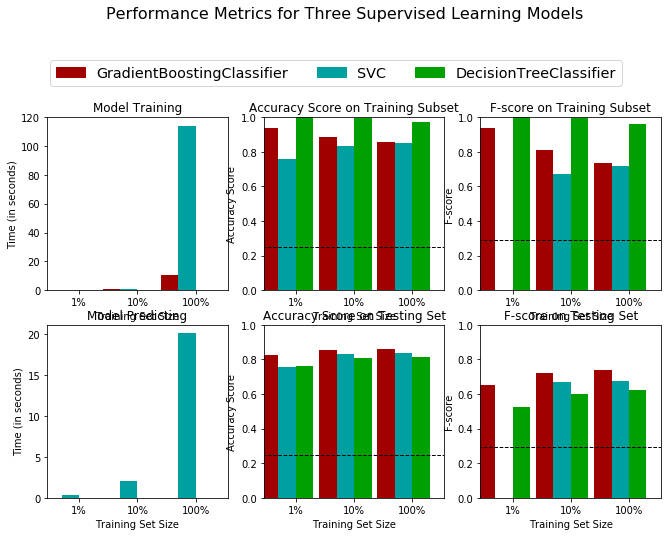

In [11]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# TODO: Initialize the three models
clf_A = GradientBoostingClassifier()
clf_B = SVC()
clf_C = DecisionTreeClassifier()

print(clf_A)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(samples_100/10)
samples_1 = int(samples_100/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

#print(results)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer:**

- metrics - F score on the testing when 100% of the training data is used,
    - As per the results shown in the chart below, the GradientBoostingClassifier has outperformed the other classifiers by scoring an F-score higher than 0.7 on the testing set when trained with 100% of the training data.
- prediction/training time
    - Despite the fact that the GradientBoostingClassifier requires more time for training and prediction when compared to the DecisionTreeClassifier, it is still remarkably fast (especially when compared to the Support Vectors Classifier).
- the algorithm's suitability for the data.
    - Since the GradientBoostingClassifier is essentially building multiple decision trees, it is expected to handle the large number of dimensions in our data efficiently; hence, it is justified to go with this model.



![title](initial_comparison_of_models.png)

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

**HINT:**

When explaining your model, if using external resources please include all citations.

**Answer:** 

- How it works?
    - A GradientBoostingClassifier is an ensemble method that utilizes multiple weak learners (typically, Decision Trees) to produce a combined and robust strong learner. In order to optimize the model, GradientBoostingClassifiers utilize/minimze a cost function (default here is Friedman Mean Squared Error) for an optimized solution to be reached.<sup>[1]</sup>
- Major Qualities
    - Due to it's high performance (accuracy of 0.86 and F<sub>0.5</sub>-score of 0.73 on the testing set), this model is expected to provide a high level of accuracy and precision in a way that cannot be easily beaten by another model.
    - Moreover, upon training the model, the prediction cost (in terms of time) is very reasonable for this model. Accordingly, upon further tuning, we should be expecting a highly responsive predictive algorithm for ChairtyML that will exceedingly satisfy the business needs.
- Sources:
    - [1] https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [12]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = GradientBoostingClassifier()

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {
    'learning_rate':[0.01,0.05,0.1,0.25,0.50,1],
    'loss':['deviance', 'exponential'],
    'n_estimators':list(np.arange(50,150,25)),
    'subsample':[0.01,0.05,0.1,0.25,0.50,1]
}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer,verbose=10)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

/usr/local/anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.01 
[CV]  learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.01, score=0.18318659471740983, total=   1.3s
[CV] learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.01 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.01, score=0.26825438366919657, total=   1.2s
[CV] learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.01 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


[CV]  learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.01, score=0.19301211608903918, total=   1.2s
[CV] learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.05 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.0s remaining:    0.0s


[CV]  learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.05, score=0.46605771226904713, total=   1.8s
[CV] learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.05 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.0s remaining:    0.0s


[CV]  learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.05, score=0.3216662558540794, total=   1.8s
[CV] learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.05 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.9s remaining:    0.0s


[CV]  learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.05, score=0.4633284853521712, total=   1.7s
[CV] learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.1 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.7s remaining:    0.0s


[CV]  learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.1, score=0.4763368162261831, total=   2.1s
[CV] learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.1 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.9s remaining:    0.0s


[CV]  learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.1, score=0.5265681948973719, total=   2.2s
[CV] learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.1 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   14.2s remaining:    0.0s


[CV]  learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.1, score=0.5046323674354426, total=   2.1s
[CV] learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.25 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   16.4s remaining:    0.0s


[CV]  learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.25, score=0.5205717597063937, total=   2.8s
[CV] learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.25 
[CV]  learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.25, score=0.5375023616096731, total=   2.8s
[CV] learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.25 
[CV]  learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.25, score=0.5240929161067384, total=   2.8s
[CV] learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.5 
[CV]  learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.5, score=0.525052793242465, total=   3.7s
[CV] learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.5 
[CV]  learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.5, score=0.538577626862856, total=   3.7s
[CV] learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.5 
[CV]  learning_rate=0.01, loss=deviance, n_estimators=50, subsample=0.5,

[CV]  learning_rate=0.01, loss=deviance, n_estimators=125, subsample=0.01, score=0.7096401972096926, total=   2.6s
[CV] learning_rate=0.01, loss=deviance, n_estimators=125, subsample=0.01 
[CV]  learning_rate=0.01, loss=deviance, n_estimators=125, subsample=0.01, score=0.7097558397632385, total=   2.6s
[CV] learning_rate=0.01, loss=deviance, n_estimators=125, subsample=0.01 
[CV]  learning_rate=0.01, loss=deviance, n_estimators=125, subsample=0.01, score=0.7089427263592721, total=   2.5s
[CV] learning_rate=0.01, loss=deviance, n_estimators=125, subsample=0.05 
[CV]  learning_rate=0.01, loss=deviance, n_estimators=125, subsample=0.05, score=0.7154446810668289, total=   4.0s
[CV] learning_rate=0.01, loss=deviance, n_estimators=125, subsample=0.05 
[CV]  learning_rate=0.01, loss=deviance, n_estimators=125, subsample=0.05, score=0.7115441393563626, total=   4.0s
[CV] learning_rate=0.01, loss=deviance, n_estimators=125, subsample=0.05 
[CV]  learning_rate=0.01, loss=deviance, n_estimators=1

/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.01, score=0.0, total=   1.0s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.01 


/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.01, score=0.0, total=   1.0s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.01 


/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.01, score=0.0, total=   1.0s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.05 


/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.05, score=0.0, total=   1.6s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.05 


/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.05, score=0.0, total=   1.6s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.05 


/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.05, score=0.0, total=   1.6s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.1 


/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.1, score=0.0, total=   2.0s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.1 


/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.1, score=0.0, total=   2.0s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.1 


/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.1, score=0.0, total=   2.0s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.25 


/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.25, score=0.0, total=   2.8s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.25 


/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.25, score=0.0, total=   2.9s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.25 


/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.25, score=0.0, total=   2.9s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.5 


/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.5, score=0.0, total=   3.9s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.5 


/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.5, score=0.0, total=   3.7s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.5 


/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, loss=exponential, n_estimators=50, subsample=0.5, score=0.0, total=   3.8s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50, subsample=1 


/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, loss=exponential, n_estimators=50, subsample=1, score=0.0, total=   4.8s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50, subsample=1 


/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, loss=exponential, n_estimators=50, subsample=1, score=0.0, total=   4.7s
[CV] learning_rate=0.01, loss=exponential, n_estimators=50, subsample=1 


/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  learning_rate=0.01, loss=exponential, n_estimators=50, subsample=1, score=0.0, total=   4.3s
[CV] learning_rate=0.01, loss=exponential, n_estimators=75, subsample=0.01 
[CV]  learning_rate=0.01, loss=exponential, n_estimators=75, subsample=0.01, score=0.21150124412496546, total=   1.4s
[CV] learning_rate=0.01, loss=exponential, n_estimators=75, subsample=0.01 
[CV]  learning_rate=0.01, loss=exponential, n_estimators=75, subsample=0.01, score=0.2794307891332471, total=   1.4s
[CV] learning_rate=0.01, loss=exponential, n_estimators=75, subsample=0.01 
[CV]  learning_rate=0.01, loss=exponential, n_estimators=75, subsample=0.01, score=0.28243487232396186, total=   1.4s
[CV] learning_rate=0.01, loss=exponential, n_estimators=75, subsample=0.05 
[CV]  learning_rate=0.01, loss=exponential, n_estimators=75, subsample=0.05, score=0.43886133275824885, total=   2.2s
[CV] learning_rate=0.01, loss=exponential, n_estimators=75, subsample=0.05 
[CV]  learning_rate=0.01, loss=exponential, n_esti

[CV]  learning_rate=0.01, loss=exponential, n_estimators=125, subsample=0.1, score=0.7069369461138841, total=   4.7s
[CV] learning_rate=0.01, loss=exponential, n_estimators=125, subsample=0.1 
[CV]  learning_rate=0.01, loss=exponential, n_estimators=125, subsample=0.1, score=0.7052403994646351, total=   4.6s
[CV] learning_rate=0.01, loss=exponential, n_estimators=125, subsample=0.1 
[CV]  learning_rate=0.01, loss=exponential, n_estimators=125, subsample=0.1, score=0.713761660203333, total=   4.6s
[CV] learning_rate=0.01, loss=exponential, n_estimators=125, subsample=0.25 
[CV]  learning_rate=0.01, loss=exponential, n_estimators=125, subsample=0.25, score=0.7077835736933619, total=   6.5s
[CV] learning_rate=0.01, loss=exponential, n_estimators=125, subsample=0.25 
[CV]  learning_rate=0.01, loss=exponential, n_estimators=125, subsample=0.25, score=0.7056553964869531, total=   6.5s
[CV] learning_rate=0.01, loss=exponential, n_estimators=125, subsample=0.25 
[CV]  learning_rate=0.01, loss=

[CV]  learning_rate=0.05, loss=deviance, n_estimators=75, subsample=0.5, score=0.7413531146661899, total=   5.4s
[CV] learning_rate=0.05, loss=deviance, n_estimators=75, subsample=1 .
[CV]  learning_rate=0.05, loss=deviance, n_estimators=75, subsample=1, score=0.7347285573741168, total=   5.7s
[CV] learning_rate=0.05, loss=deviance, n_estimators=75, subsample=1 .
[CV]  learning_rate=0.05, loss=deviance, n_estimators=75, subsample=1, score=0.7317073170731708, total=   5.6s
[CV] learning_rate=0.05, loss=deviance, n_estimators=75, subsample=1 .
[CV]  learning_rate=0.05, loss=deviance, n_estimators=75, subsample=1, score=0.7385702782499775, total=   5.7s
[CV] learning_rate=0.05, loss=deviance, n_estimators=100, subsample=0.01 
[CV]  learning_rate=0.05, loss=deviance, n_estimators=100, subsample=0.01, score=0.7143424711958681, total=   2.0s
[CV] learning_rate=0.05, loss=deviance, n_estimators=100, subsample=0.01 
[CV]  learning_rate=0.05, loss=deviance, n_estimators=100, subsample=0.01, sco

[CV]  learning_rate=0.05, loss=exponential, n_estimators=50, subsample=0.05, score=0.7211583372255957, total=   1.5s
[CV] learning_rate=0.05, loss=exponential, n_estimators=50, subsample=0.05 
[CV]  learning_rate=0.05, loss=exponential, n_estimators=50, subsample=0.05, score=0.7259799794180934, total=   1.6s
[CV] learning_rate=0.05, loss=exponential, n_estimators=50, subsample=0.1 
[CV]  learning_rate=0.05, loss=exponential, n_estimators=50, subsample=0.1, score=0.7243963363863447, total=   2.0s
[CV] learning_rate=0.05, loss=exponential, n_estimators=50, subsample=0.1 
[CV]  learning_rate=0.05, loss=exponential, n_estimators=50, subsample=0.1, score=0.7275169028433823, total=   1.9s
[CV] learning_rate=0.05, loss=exponential, n_estimators=50, subsample=0.1 
[CV]  learning_rate=0.05, loss=exponential, n_estimators=50, subsample=0.1, score=0.726044342944143, total=   1.9s
[CV] learning_rate=0.05, loss=exponential, n_estimators=50, subsample=0.25 
[CV]  learning_rate=0.05, loss=exponential

[CV]  learning_rate=0.05, loss=exponential, n_estimators=100, subsample=0.25, score=0.7341935483870967, total=   5.1s
[CV] learning_rate=0.05, loss=exponential, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.05, loss=exponential, n_estimators=100, subsample=0.5, score=0.7321534927252616, total=   7.0s
[CV] learning_rate=0.05, loss=exponential, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.05, loss=exponential, n_estimators=100, subsample=0.5, score=0.7334124226760445, total=   7.1s
[CV] learning_rate=0.05, loss=exponential, n_estimators=100, subsample=0.5 
[CV]  learning_rate=0.05, loss=exponential, n_estimators=100, subsample=0.5, score=0.7368284901267569, total=   7.1s
[CV] learning_rate=0.05, loss=exponential, n_estimators=100, subsample=1 
[CV]  learning_rate=0.05, loss=exponential, n_estimators=100, subsample=1, score=0.7337348375604377, total=   7.3s
[CV] learning_rate=0.05, loss=exponential, n_estimators=100, subsample=1 
[CV]  learning_rate=0.05, loss=exponenti

[CV]  learning_rate=0.1, loss=deviance, n_estimators=75, subsample=0.01, score=0.6663042634153917, total=   1.4s
[CV] learning_rate=0.1, loss=deviance, n_estimators=75, subsample=0.01 
[CV]  learning_rate=0.1, loss=deviance, n_estimators=75, subsample=0.01, score=0.6980178779634668, total=   1.5s
[CV] learning_rate=0.1, loss=deviance, n_estimators=75, subsample=0.05 
[CV]  learning_rate=0.1, loss=deviance, n_estimators=75, subsample=0.05, score=0.72641735108843, total=   2.3s
[CV] learning_rate=0.1, loss=deviance, n_estimators=75, subsample=0.05 
[CV]  learning_rate=0.1, loss=deviance, n_estimators=75, subsample=0.05, score=0.7242493498305618, total=   2.4s
[CV] learning_rate=0.1, loss=deviance, n_estimators=75, subsample=0.05 
[CV]  learning_rate=0.1, loss=deviance, n_estimators=75, subsample=0.05, score=0.7342742922411684, total=   2.3s
[CV] learning_rate=0.1, loss=deviance, n_estimators=75, subsample=0.1 
[CV]  learning_rate=0.1, loss=deviance, n_estimators=75, subsample=0.1, score=

[CV]  learning_rate=0.1, loss=deviance, n_estimators=125, subsample=0.25, score=0.7377874119377563, total=   6.5s
[CV] learning_rate=0.1, loss=deviance, n_estimators=125, subsample=0.25 
[CV]  learning_rate=0.1, loss=deviance, n_estimators=125, subsample=0.25, score=0.7447752763656903, total=   6.4s
[CV] learning_rate=0.1, loss=deviance, n_estimators=125, subsample=0.5 
[CV]  learning_rate=0.1, loss=deviance, n_estimators=125, subsample=0.5, score=0.745589747646547, total=   8.9s
[CV] learning_rate=0.1, loss=deviance, n_estimators=125, subsample=0.5 
[CV]  learning_rate=0.1, loss=deviance, n_estimators=125, subsample=0.5, score=0.7418850215095815, total=   8.9s
[CV] learning_rate=0.1, loss=deviance, n_estimators=125, subsample=0.5 
[CV]  learning_rate=0.1, loss=deviance, n_estimators=125, subsample=0.5, score=0.7511417354378656, total=   8.9s
[CV] learning_rate=0.1, loss=deviance, n_estimators=125, subsample=1 .
[CV]  learning_rate=0.1, loss=deviance, n_estimators=125, subsample=1, sco

[CV]  learning_rate=0.1, loss=exponential, n_estimators=100, subsample=0.01, score=0.7118259372309619, total=   1.7s
[CV] learning_rate=0.1, loss=exponential, n_estimators=100, subsample=0.01 
[CV]  learning_rate=0.1, loss=exponential, n_estimators=100, subsample=0.01, score=0.7048235019091406, total=   1.8s
[CV] learning_rate=0.1, loss=exponential, n_estimators=100, subsample=0.01 
[CV]  learning_rate=0.1, loss=exponential, n_estimators=100, subsample=0.01, score=0.7156096381658472, total=   1.8s
[CV] learning_rate=0.1, loss=exponential, n_estimators=100, subsample=0.05 
[CV]  learning_rate=0.1, loss=exponential, n_estimators=100, subsample=0.05, score=0.7256384538230075, total=   2.9s
[CV] learning_rate=0.1, loss=exponential, n_estimators=100, subsample=0.05 
[CV]  learning_rate=0.1, loss=exponential, n_estimators=100, subsample=0.05, score=0.7244646126900725, total=   3.0s
[CV] learning_rate=0.1, loss=exponential, n_estimators=100, subsample=0.05 
[CV]  learning_rate=0.1, loss=expon

[CV]  learning_rate=0.25, loss=deviance, n_estimators=50, subsample=0.1, score=0.7179126630731975, total=   1.9s
[CV] learning_rate=0.25, loss=deviance, n_estimators=50, subsample=0.25 
[CV]  learning_rate=0.25, loss=deviance, n_estimators=50, subsample=0.25, score=0.7421533571712357, total=   2.7s
[CV] learning_rate=0.25, loss=deviance, n_estimators=50, subsample=0.25 
[CV]  learning_rate=0.25, loss=deviance, n_estimators=50, subsample=0.25, score=0.7282415630550623, total=   2.6s
[CV] learning_rate=0.25, loss=deviance, n_estimators=50, subsample=0.25 
[CV]  learning_rate=0.25, loss=deviance, n_estimators=50, subsample=0.25, score=0.7399952640303102, total=   2.6s
[CV] learning_rate=0.25, loss=deviance, n_estimators=50, subsample=0.5 
[CV]  learning_rate=0.25, loss=deviance, n_estimators=50, subsample=0.5, score=0.7466993438216459, total=   3.7s
[CV] learning_rate=0.25, loss=deviance, n_estimators=50, subsample=0.5 
[CV]  learning_rate=0.25, loss=deviance, n_estimators=50, subsample=0

[CV]  learning_rate=0.25, loss=deviance, n_estimators=100, subsample=1, score=0.7590667407348622, total=   5.7s
[CV] learning_rate=0.25, loss=deviance, n_estimators=125, subsample=0.01 
[CV]  learning_rate=0.25, loss=deviance, n_estimators=125, subsample=0.01, score=0.5667913523109112, total=   2.3s
[CV] learning_rate=0.25, loss=deviance, n_estimators=125, subsample=0.01 
[CV]  learning_rate=0.25, loss=deviance, n_estimators=125, subsample=0.01, score=0.5490002119691939, total=   2.2s
[CV] learning_rate=0.25, loss=deviance, n_estimators=125, subsample=0.01 
[CV]  learning_rate=0.25, loss=deviance, n_estimators=125, subsample=0.01, score=0.5894436320590488, total=   2.2s
[CV] learning_rate=0.25, loss=deviance, n_estimators=125, subsample=0.05 
[CV]  learning_rate=0.25, loss=deviance, n_estimators=125, subsample=0.05, score=0.7018671101368207, total=   3.3s
[CV] learning_rate=0.25, loss=deviance, n_estimators=125, subsample=0.05 
[CV]  learning_rate=0.25, loss=deviance, n_estimators=125,

[CV]  learning_rate=0.25, loss=exponential, n_estimators=75, subsample=0.1, score=0.7203293797688298, total=   2.5s
[CV] learning_rate=0.25, loss=exponential, n_estimators=75, subsample=0.1 
[CV]  learning_rate=0.25, loss=exponential, n_estimators=75, subsample=0.1, score=0.7229693792265026, total=   2.5s
[CV] learning_rate=0.25, loss=exponential, n_estimators=75, subsample=0.25 
[CV]  learning_rate=0.25, loss=exponential, n_estimators=75, subsample=0.25, score=0.7329999253564231, total=   3.6s
[CV] learning_rate=0.25, loss=exponential, n_estimators=75, subsample=0.25 
[CV]  learning_rate=0.25, loss=exponential, n_estimators=75, subsample=0.25, score=0.729143115532444, total=   3.6s
[CV] learning_rate=0.25, loss=exponential, n_estimators=75, subsample=0.25 
[CV]  learning_rate=0.25, loss=exponential, n_estimators=75, subsample=0.25, score=0.7353280516883316, total=   3.6s
[CV] learning_rate=0.25, loss=exponential, n_estimators=75, subsample=0.5 
[CV]  learning_rate=0.25, loss=exponenti

[CV]  learning_rate=0.25, loss=exponential, n_estimators=125, subsample=0.5, score=0.7464063340764087, total=   8.3s
[CV] learning_rate=0.25, loss=exponential, n_estimators=125, subsample=1 
[CV]  learning_rate=0.25, loss=exponential, n_estimators=125, subsample=1, score=0.7494795281054822, total=   6.5s
[CV] learning_rate=0.25, loss=exponential, n_estimators=125, subsample=1 
[CV]  learning_rate=0.25, loss=exponential, n_estimators=125, subsample=1, score=0.7453322246579485, total=   6.5s
[CV] learning_rate=0.25, loss=exponential, n_estimators=125, subsample=1 
[CV]  learning_rate=0.25, loss=exponential, n_estimators=125, subsample=1, score=0.757410721232397, total=   6.8s
[CV] learning_rate=0.5, loss=deviance, n_estimators=50, subsample=0.01 
[CV]  learning_rate=0.5, loss=deviance, n_estimators=50, subsample=0.01, score=0.5681426898973899, total=   1.0s
[CV] learning_rate=0.5, loss=deviance, n_estimators=50, subsample=0.01 
[CV]  learning_rate=0.5, loss=deviance, n_estimators=50, sub

[CV]  learning_rate=0.5, loss=deviance, n_estimators=100, subsample=0.05, score=0.6690419635787808, total=   2.8s
[CV] learning_rate=0.5, loss=deviance, n_estimators=100, subsample=0.1 
[CV]  learning_rate=0.5, loss=deviance, n_estimators=100, subsample=0.1, score=0.7094568641007912, total=   3.3s
[CV] learning_rate=0.5, loss=deviance, n_estimators=100, subsample=0.1 
[CV]  learning_rate=0.5, loss=deviance, n_estimators=100, subsample=0.1, score=0.7070976595258063, total=   3.3s
[CV] learning_rate=0.5, loss=deviance, n_estimators=100, subsample=0.1 
[CV]  learning_rate=0.5, loss=deviance, n_estimators=100, subsample=0.1, score=0.6934118513065881, total=   3.4s
[CV] learning_rate=0.5, loss=deviance, n_estimators=100, subsample=0.25 
[CV]  learning_rate=0.5, loss=deviance, n_estimators=100, subsample=0.25, score=0.7254255079853039, total=   4.7s
[CV] learning_rate=0.5, loss=deviance, n_estimators=100, subsample=0.25 
[CV]  learning_rate=0.5, loss=deviance, n_estimators=100, subsample=0.2

[CV]  learning_rate=0.5, loss=exponential, n_estimators=50, subsample=0.5, score=0.7417350617473345, total=   3.4s
[CV] learning_rate=0.5, loss=exponential, n_estimators=50, subsample=0.5 
[CV]  learning_rate=0.5, loss=exponential, n_estimators=50, subsample=0.5, score=0.7336565411711233, total=   3.4s
[CV] learning_rate=0.5, loss=exponential, n_estimators=50, subsample=1 
[CV]  learning_rate=0.5, loss=exponential, n_estimators=50, subsample=1, score=0.7478648918981303, total=   2.8s
[CV] learning_rate=0.5, loss=exponential, n_estimators=50, subsample=1 
[CV]  learning_rate=0.5, loss=exponential, n_estimators=50, subsample=1, score=0.7425555974368638, total=   2.8s
[CV] learning_rate=0.5, loss=exponential, n_estimators=50, subsample=1 
[CV]  learning_rate=0.5, loss=exponential, n_estimators=50, subsample=1, score=0.7499416841614182, total=   2.7s
[CV] learning_rate=0.5, loss=exponential, n_estimators=75, subsample=0.01 
[CV]  learning_rate=0.5, loss=exponential, n_estimators=75, subsam

[CV]  learning_rate=0.5, loss=exponential, n_estimators=125, subsample=0.05, score=0.7002001630958559, total=   3.2s
[CV] learning_rate=0.5, loss=exponential, n_estimators=125, subsample=0.05 
[CV]  learning_rate=0.5, loss=exponential, n_estimators=125, subsample=0.05, score=0.7080359198710567, total=   3.2s
[CV] learning_rate=0.5, loss=exponential, n_estimators=125, subsample=0.05 
[CV]  learning_rate=0.5, loss=exponential, n_estimators=125, subsample=0.05, score=0.6965099768328226, total=   3.1s
[CV] learning_rate=0.5, loss=exponential, n_estimators=125, subsample=0.1 
[CV]  learning_rate=0.5, loss=exponential, n_estimators=125, subsample=0.1, score=0.711899157111398, total=   4.0s
[CV] learning_rate=0.5, loss=exponential, n_estimators=125, subsample=0.1 
[CV]  learning_rate=0.5, loss=exponential, n_estimators=125, subsample=0.1, score=0.7086436470322727, total=   4.0s
[CV] learning_rate=0.5, loss=exponential, n_estimators=125, subsample=0.1 
[CV]  learning_rate=0.5, loss=exponential

[CV]  learning_rate=1, loss=deviance, n_estimators=75, subsample=0.5, score=0.7263778059512268, total=   5.0s
[CV] learning_rate=1, loss=deviance, n_estimators=75, subsample=0.5 ..
[CV]  learning_rate=1, loss=deviance, n_estimators=75, subsample=0.5, score=0.7166972477064221, total=   5.0s
[CV] learning_rate=1, loss=deviance, n_estimators=75, subsample=0.5 ..
[CV]  learning_rate=1, loss=deviance, n_estimators=75, subsample=0.5, score=0.7364733359283768, total=   5.0s
[CV] learning_rate=1, loss=deviance, n_estimators=75, subsample=1 ....
[CV]  learning_rate=1, loss=deviance, n_estimators=75, subsample=1, score=0.7393971127234649, total=   3.4s
[CV] learning_rate=1, loss=deviance, n_estimators=75, subsample=1 ....
[CV]  learning_rate=1, loss=deviance, n_estimators=75, subsample=1, score=0.7326544069162576, total=   3.9s
[CV] learning_rate=1, loss=deviance, n_estimators=75, subsample=1 ....
[CV]  learning_rate=1, loss=deviance, n_estimators=75, subsample=1, score=0.7470065662417922, total

[CV]  learning_rate=1, loss=exponential, n_estimators=50, subsample=0.05, score=0.6596440247003269, total=   1.3s
[CV] learning_rate=1, loss=exponential, n_estimators=50, subsample=0.05 
[CV]  learning_rate=1, loss=exponential, n_estimators=50, subsample=0.05, score=0.6714233443102817, total=   1.3s
[CV] learning_rate=1, loss=exponential, n_estimators=50, subsample=0.05 
[CV]  learning_rate=1, loss=exponential, n_estimators=50, subsample=0.05, score=0.6736879685826491, total=   1.3s
[CV] learning_rate=1, loss=exponential, n_estimators=50, subsample=0.1 
[CV]  learning_rate=1, loss=exponential, n_estimators=50, subsample=0.1, score=0.6949414158422788, total=   1.6s
[CV] learning_rate=1, loss=exponential, n_estimators=50, subsample=0.1 
[CV]  learning_rate=1, loss=exponential, n_estimators=50, subsample=0.1, score=0.6798015789841402, total=   1.6s
[CV] learning_rate=1, loss=exponential, n_estimators=50, subsample=0.1 
[CV]  learning_rate=1, loss=exponential, n_estimators=50, subsample=0.

[CV]  learning_rate=1, loss=exponential, n_estimators=100, subsample=0.5, score=0.7167460608281422, total=   6.6s
[CV] learning_rate=1, loss=exponential, n_estimators=100, subsample=0.5 
[CV]  learning_rate=1, loss=exponential, n_estimators=100, subsample=0.5, score=0.7222909540790335, total=   6.7s
[CV] learning_rate=1, loss=exponential, n_estimators=100, subsample=0.5 
[CV]  learning_rate=1, loss=exponential, n_estimators=100, subsample=0.5, score=0.7238257772501299, total=   6.6s
[CV] learning_rate=1, loss=exponential, n_estimators=100, subsample=1 
[CV]  learning_rate=1, loss=exponential, n_estimators=100, subsample=1, score=0.7412032615881877, total=   5.3s
[CV] learning_rate=1, loss=exponential, n_estimators=100, subsample=1 
[CV]  learning_rate=1, loss=exponential, n_estimators=100, subsample=1, score=0.7353914002205072, total=   5.2s
[CV] learning_rate=1, loss=exponential, n_estimators=100, subsample=1 
[CV]  learning_rate=1, loss=exponential, n_estimators=100, subsample=1, sco

[Parallel(n_jobs=1)]: Done 864 out of 864 | elapsed: 57.4min finished


Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the testing data: 0.8704
Final F-score on the testing data: 0.7529


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |    0.8630         |   0.8704        |
| F-score        |    0.7395         |   0.7529        |


**Answer: **

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

In [ ]:
# TODO: Import a supervised learning model that has 'feature_importances_'


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = None

# TODO: Extract the feature importances using .feature_importances_ 
importances = None

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [ ]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

## Before You Submit
You will also need run the following in order to convert the Jupyter notebook into HTML, so that your submission will include both files.

In [ ]:
!!jupyter nbconvert *.ipynb